In [68]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from pylab import rcParams

In [69]:
#Reading the files
train=pd.read_csv('Study/Mid Project -1/Dataset/train.csv')
test=pd.read_csv('Study/Mid Project -1/Dataset/test.csv')
train_label=pd.read_csv('Study/Mid Project -1/Dataset/train_label.csv',header=None)
test_label=pd.read_csv('Study/Mid Project -1/Dataset/test_label.csv',header=None)

In [70]:
#  combining the indepedent and target variables
train['totalbooking']=train_label
test['totalbooking']=test_label

In [71]:
print(train.shape)
print(test.shape)

(8708, 10)
(2178, 10)


# Feature Engineering

In [72]:
# datetime seperation into date and hour columns
train['date']=train.datetime.apply(lambda x:x.split()[0])
train['hour']=train.datetime.apply(lambda x:x.split()[1].split(':')[0])
test['date']=test.datetime.apply(lambda x:x.split()[0])
test['hour']=test.datetime.apply(lambda x:x.split()[1].split(':')[0])
train.sample(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbooking,date,hour
2422,2/9/2011 9:00,Spring,0,1,Clear + Few clouds,4.92,6.820,39,11.0014,123,2/9/2011,9
6637,3/2/2012 14:00,Spring,0,1,Mist + Cloudy,18.04,21.970,44,19.0012,205,3/2/2012,14
2675,7/6/2011 21:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,12.9980,241,7/6/2011,21


In [73]:
# date column from object to datetime series
train['date']=pd.to_datetime(train['date'])
test['date']=pd.to_datetime(test['date'])
train.sample(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbooking,date,hour
8208,9/9/2012 5:00,Fall,0,0,Clear + Few clouds,21.32,25.000,77,12.9980,55,2012-09-09,5
2468,6/16/2011 7:00,Summer,0,1,"Light Snow, Light Rain",22.96,26.515,78,11.0014,188,2011-06-16,7
2053,8/6/2012 19:00,Fall,0,1,Clear + Few clouds,31.98,37.120,59,12.9980,640,2012-08-06,19


In [74]:
# seperating month,weekday amd year from the date column
train['month'] = train['date'].dt.month
train['weekday'] = train['date'].dt.weekday
test['month'] = test['date'].dt.month
test['weekday'] = test['date'].dt.weekday
train['year'] = train['date'].dt.year
test['year'] = test['date'].dt.year
train.sample(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbooking,date,hour,month,weekday,year
1035,11/6/2011 20:00,Winter,0,0,Clear + Few clouds,14.76,18.180,81,7.0015,116,2011-11-06,20,11,6,2011
3308,5/4/2011 5:00,Summer,0,1,"Light Snow, Light Rain",14.76,16.665,87,22.0028,9,2011-05-04,5,5,2,2011
69,1/9/2012 5:00,Spring,0,1,Mist + Cloudy,8.20,11.365,64,6.0032,21,2012-01-09,5,1,0,2012


In [75]:
#changing the hour data type
train['hour']=train['hour'].astype(int)
test['hour']=test['hour'].astype(int)
train.sample(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbooking,date,hour,month,weekday,year
1008,8/2/2012 17:00,Fall,0,1,Clear + Few clouds,33.62,38.635,52,16.9979,865,2012-08-02,17,8,3,2012
2592,3/4/2012 9:00,Spring,0,0,Clear + Few clouds,12.30,13.635,49,30.0026,118,2012-03-04,9,3,6,2012
1230,12/4/2011 13:00,Winter,0,0,Clear + Few clouds,16.40,20.455,66,15.0013,357,2011-12-04,13,12,6,2011


In [76]:
# drop datatime column
train=train.drop('datetime',axis=1)
test=test.drop('datetime',axis=1)
train.sample(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbooking,date,hour,month,weekday,year
6079,Summer,0,1,Clear + Few clouds,22.14,25.760,30,16.9979,162,2012-04-17,22,4,1,2012
833,Winter,0,1,Clear + Few clouds,12.30,16.665,56,0.0000,213,2012-11-14,21,11,2,2012
5450,Summer,0,1,Clear + Few clouds,26.24,30.305,23,16.9979,503,2012-05-11,19,5,4,2012


In [77]:
#seperation of weather into two columns
train[['weather1','weather2']] = train["weather"].str.split('[+|,]',n =1, expand = True)
test[['weather1','weather2']] = test["weather"].str.split('[+|,]',n =1, expand = True)
train.sample(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbooking,date,hour,month,weekday,year,weather1,weather2
669,Winter,0,1,Mist + Cloudy,20.50,24.24,55,11.0014,309,2011-10-17,7,10,0,2011,Mist,Cloudy
5612,Spring,0,1,Mist + Cloudy,7.38,9.85,93,11.0014,83,2012-01-10,10,1,1,2012,Mist,Cloudy
3357,Summer,0,1,Mist + Cloudy,27.06,31.06,50,12.9980,357,2012-05-09,16,5,2,2012,Mist,Cloudy


In [78]:
# drop the weather column
train=train.drop('weather',axis=1)
test=test.drop('weather',axis=1)
train.sample(3)

,season,holiday,workingday,temp,atemp,humidity,windspeed,totalbooking,date,hour,month,weekday,year,weather1,weather2
5681,Spring,0,1,6.56,7.575,93,12.9980,32,2011-01-11,20,1,1,2011,Light Snow,Light Rain
7411,Winter,0,1,20.50,24.240,31,7.0015,291,2012-10-11,13,10,3,2012,Clear,Few clouds
1421,Winter,0,1,10.66,15.150,70,0.0000,71,2011-12-12,22,12,0,2011,Clear,Few clouds


In [79]:
#removing the holiday and workingday that are same  
train = train.loc[(train['holiday'] == 0) & (train['workingday'] != 0)] 
test = test.loc[(test['holiday'] == 0) & (test['workingday'] != 0)] 
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train.sample(3)

,season,holiday,workingday,temp,atemp,humidity,windspeed,totalbooking,date,hour,month,weekday,year,weather1,weather2
887,Fall,0,1,36.90,41.665,39,22.0028,607,2012-07-05,18,7,3,2012,Mist,Cloudy
3305,Summer,0,1,22.96,26.515,73,19.9995,538,2012-06-06,19,6,2,2012,Clear,Few clouds
4386,Summer,0,1,22.96,26.515,94,19.9995,54,2011-05-18,12,5,2,2011,Clear,Few clouds


In [80]:
# some data of windspeed has no values filling those values with mean
#train['windspeed']=train['windspeed'].replace(to_replace=0.0000,value=train['windspeed'].mean())
#test['windspeed']=test['windspeed'].replace(to_replace=0.0000,value=test['windspeed'].mean())
#train.sample(3)

In [81]:
# date column is not need because we are have those info in other columns
train=train.drop('date',axis=1)
test=test.drop('date',axis=1)
train.sample(3)

,season,holiday,workingday,temp,atemp,humidity,windspeed,totalbooking,hour,month,weekday,year,weather1,weather2
923,Winter,0,1,18.86,22.725,82,8.9981,5,3,12,4,2011,Clear,Few clouds
1594,Fall,0,1,33.62,34.850,23,12.9980,303,14,7,4,2011,Clear,Few clouds
1072,Winter,0,1,13.94,16.665,49,12.9980,178,21,11,4,2012,Clear,Few clouds


In [82]:
# the temp and actual temp as high correlation we can remove any one of them
print(train['temp'].corr(train['atemp']))
train=train.drop('temp',axis=1)
test=test.drop('temp',axis=1)
train.sample(3)

0.9797856252890171


,season,holiday,workingday,atemp,humidity,windspeed,totalbooking,hour,month,weekday,year,weather1,weather2
17,Fall,0,1,34.85,74,7.0015,224,22,8,1,2012,Clear,Few clouds
2997,Winter,0,1,9.09,86,7.0015,68,6,12,0,2011,Clear,Few clouds
3585,Summer,0,1,21.21,67,12.9980,99,22,4,2,2011,Clear,Few clouds


In [83]:
print(train.shape)
print(test.shape)

(5924, 13)
(1488, 13)


# Outlier analysis

In [84]:
train.describe()

,holiday,workingday,atemp,humidity,windspeed,totalbooking,hour,month,weekday,year
count,5924.0,5924.0,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000
mean,0.0,1.0,23.808046,61.527009,12.917074,194.535955,11.589298,6.525321,2.043552,2011.502870
std,0.0,0.0,8.436218,19.248119,8.174576,184.835890,6.867819,3.412820,1.390664,0.500034
min,0.0,1.0,0.760000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2011.000000
25%,0.0,1.0,16.665000,47.000000,7.001500,43.000000,6.000000,4.000000,1.000000,2011.000000
50%,0.0,1.0,24.240000,61.000000,12.998000,153.000000,12.000000,6.000000,2.000000,2012.000000
75%,0.0,1.0,31.060000,77.000000,19.001200,280.000000,17.000000,9.000000,3.000000,2012.000000
max,0.0,1.0,43.940000,100.000000,51.998700,977.000000,23.000000,12.000000,4.000000,2012.000000


In [85]:
rcParams['figure.figsize'] = 16,8 # fixing the size for all plots

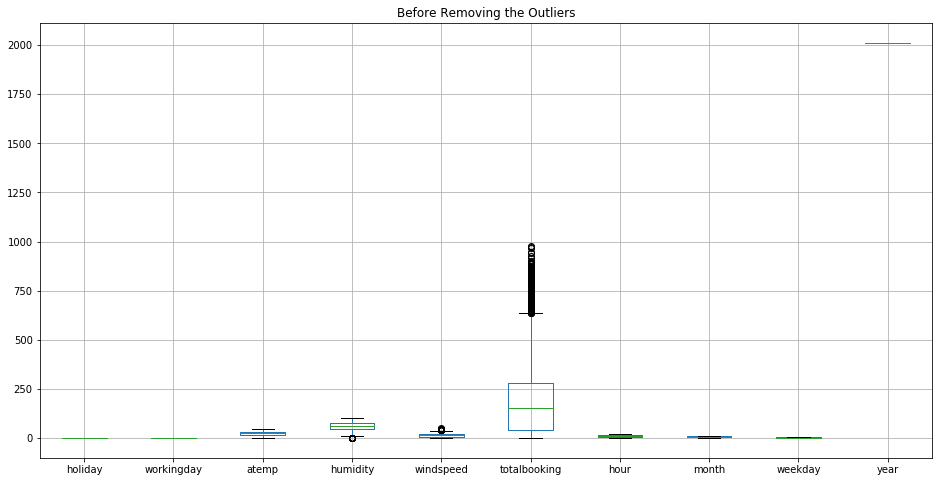

In [86]:
train.boxplot()
plt.title('Before Removing the Outliers')
plt.show()

In [87]:
Q1 = train.quantile(0.15)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
Q1t = test.quantile(0.15)
Q3t = test.quantile(0.75)
IQRt = Q3t - Q1t
test = test[~((test < (Q1t - 1.5 * IQRt)) |(test > (Q3t + 1.5 * IQRt))).any(axis=1)]

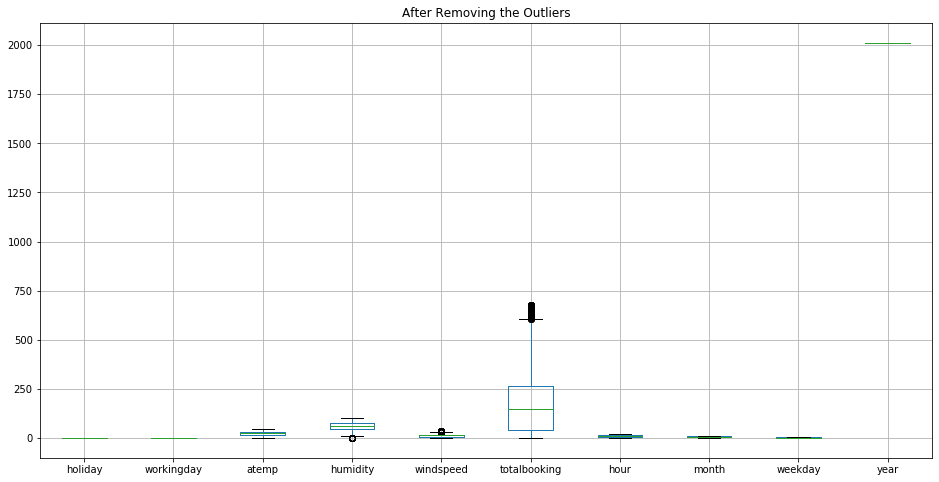

In [88]:
train.boxplot()
plt.title('After Removing the Outliers')
plt.show()

In [89]:
train.describe()

,holiday,workingday,atemp,humidity,windspeed,totalbooking,hour,month,weekday,year
count,5727.0,5727.0,5727.000000,5727.000000,5727.000000,5727.000000,5727.000000,5727.000000,5727.000000,5727.000000
mean,0.0,1.0,23.629732,61.835865,12.761601,177.407369,11.468483,6.508294,2.049240,2011.488214
std,0.0,0.0,8.414844,19.213180,7.942817,156.775847,6.906289,3.432533,1.392066,0.499905
min,0.0,1.0,0.760000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2011.000000
25%,0.0,1.0,16.665000,47.000000,7.001500,40.000000,6.000000,4.000000,1.000000,2011.000000
50%,0.0,1.0,24.240000,61.000000,12.998000,147.000000,11.000000,6.000000,2.000000,2011.000000
75%,0.0,1.0,31.060000,77.000000,16.997900,266.000000,17.000000,10.000000,3.000000,2012.000000
max,0.0,1.0,43.940000,100.000000,36.997400,679.000000,23.000000,12.000000,4.000000,2012.000000


In [90]:
print(train.shape)
print(test.shape)

(5727, 13)
(1422, 13)


# Correlation Analysis

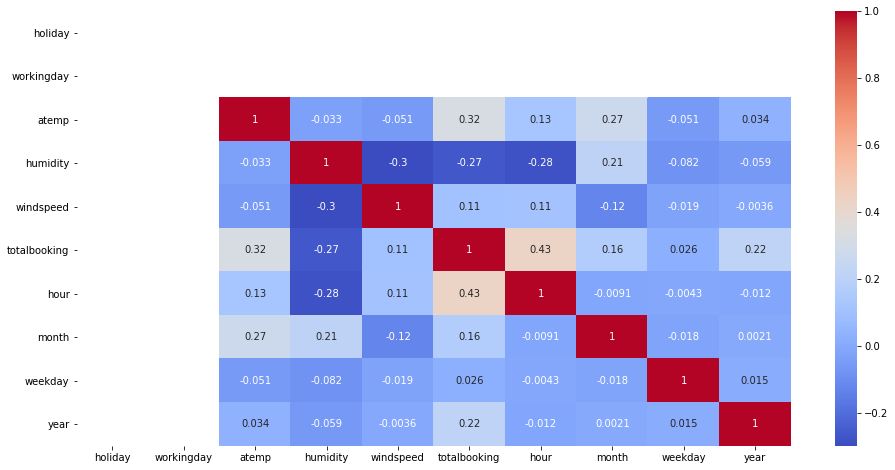

In [91]:
corrmat = train.corr()
top_corr_features = corrmat.index
sns.heatmap(train[top_corr_features].corr(),annot=True,cmap='coolwarm')

In [92]:
# as there is no correlation in holiday and weekday 
# date column is not need because we are have those info in other columns
train=train.drop(['holiday','workingday'],axis=1)
test=test.drop(['holiday','workingday'],axis=1)
train.sample(3)

,season,atemp,humidity,windspeed,totalbooking,hour,month,weekday,year,weather1,weather2
5088,Spring,9.850,51,11.0014,15,23,1,4,2011,Mist,Cloudy
4526,Winter,26.515,43,11.0014,270,14,10,2,2012,Mist,Cloudy
1599,Winter,31.060,41,0.0000,270,15,10,4,2011,Clear,Few clouds


# Visualizing the data

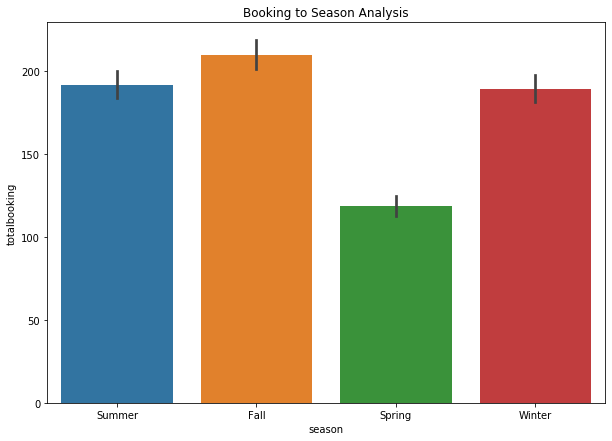

In [93]:
plt.figure(figsize=(10,7))
sns.barplot(x='season',y='totalbooking',data=train)
plt.title('Booking to Season Analysis')
plt.show()

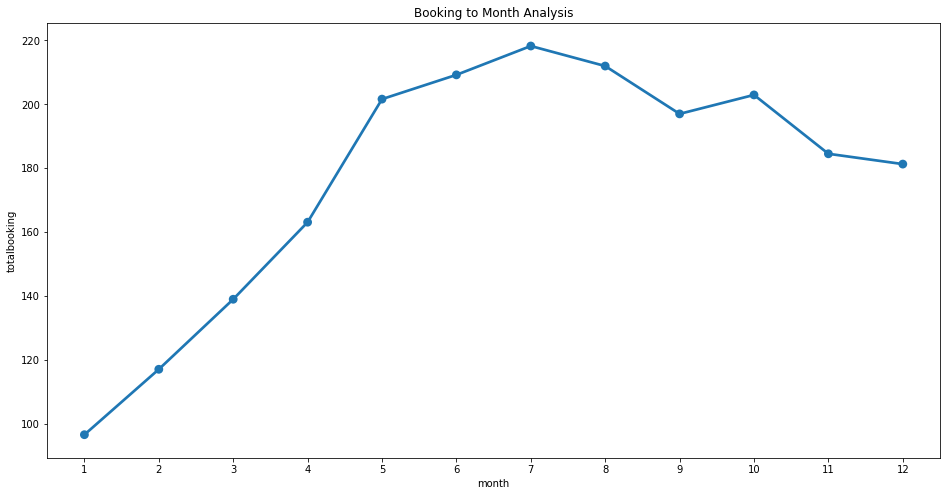

In [94]:
sns.pointplot(x='month',y='totalbooking',data=train,kind='line',ci=False)
plt.title('Booking to Month Analysis')
plt.show()

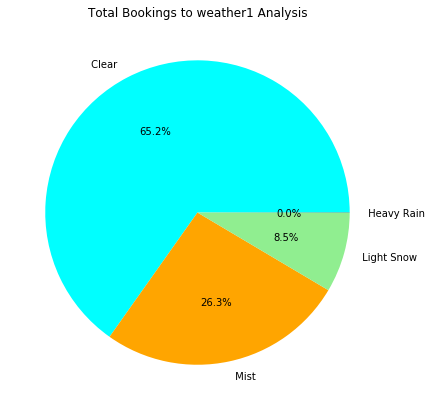

In [95]:
labels=train.weather1.unique().tolist()
colors=['cyan','orange','lightgreen','black']
values=train['weather1'].value_counts().values
#visualization
plt.figure(figsize=(7,7))
plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Total Bookings to weather1 Analysis')
plt.show()

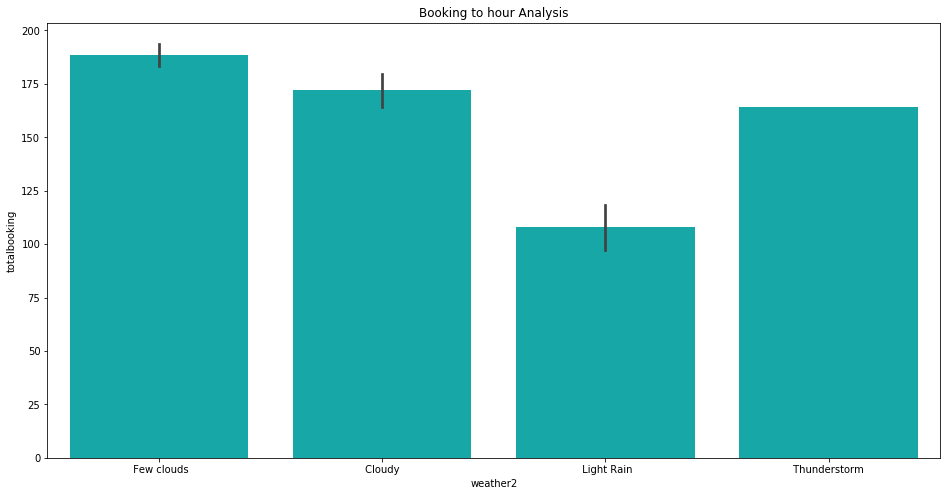

In [96]:
sns.barplot(x="weather2",y='totalbooking', data=train, color="c")
plt.title('Booking to hour Analysis')
plt.show()

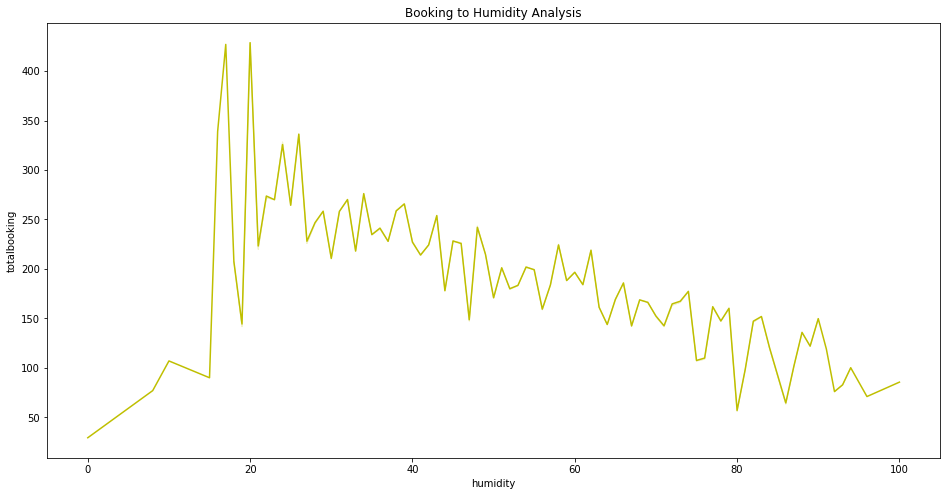

In [97]:
sns.lineplot(x = 'humidity', y  = 'totalbooking', data = train,ci=False,color='y')
plt.title('Booking to Humidity Analysis')
plt.show()

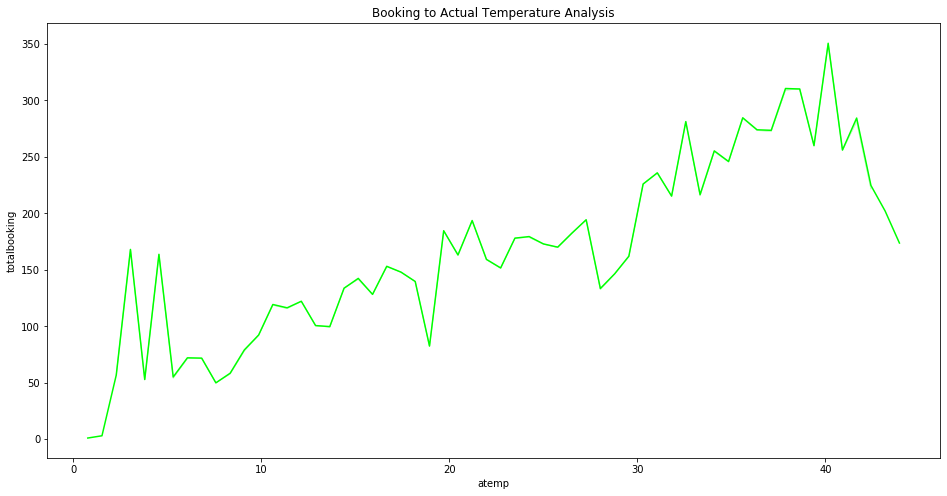

In [98]:
sns.lineplot(x = 'atemp', y = 'totalbooking',data = train,ci=False,color='lime')
plt.title('Booking to Actual Temperature Analysis')
plt.show()

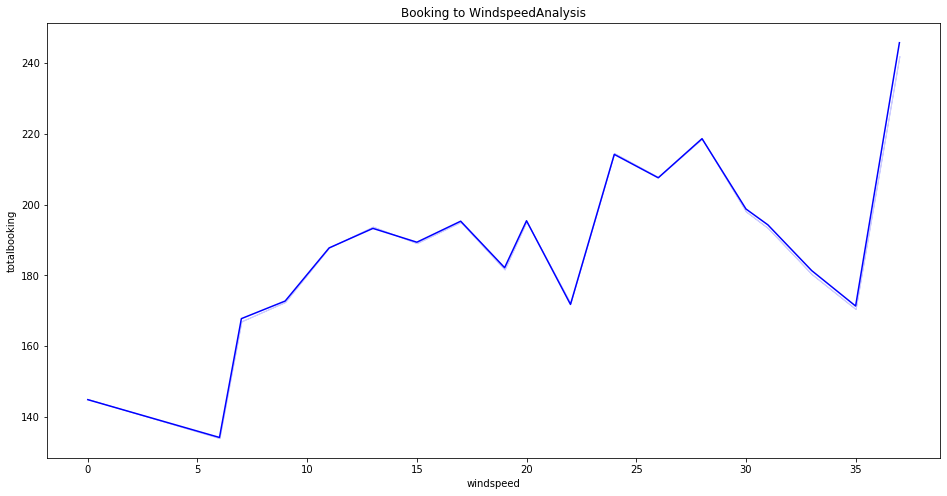

In [99]:
sns.lineplot(x = 'windspeed', y  = 'totalbooking', data = train,ci=False,color='blue')
plt.title('Booking to WindspeedAnalysis')
plt.show()

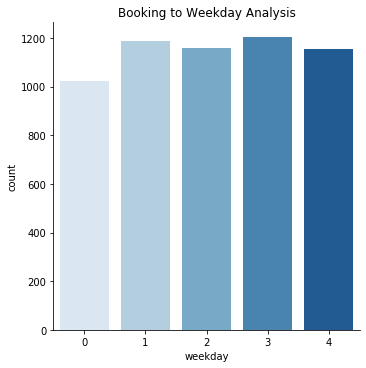

In [100]:
sns.catplot(x='weekday', kind='count', palette='Blues', data=train)
plt.title('Booking to Weekday Analysis')
plt.show()

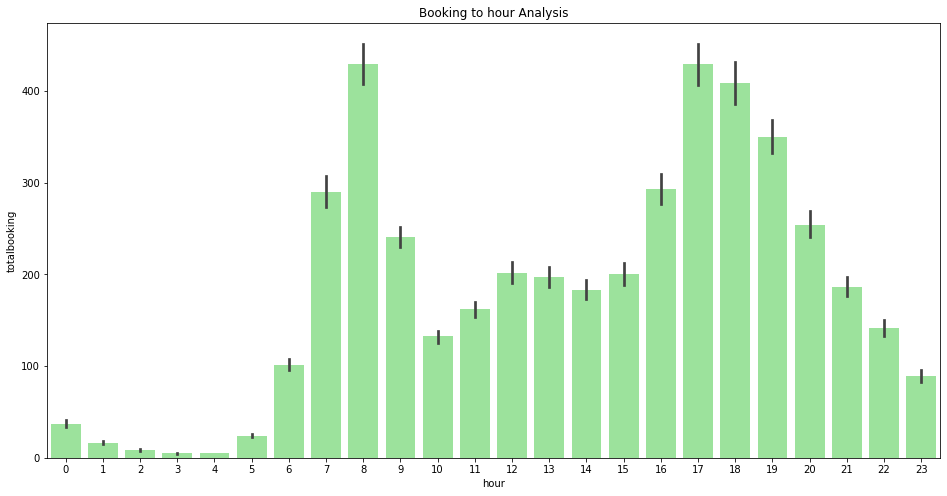

In [101]:
sns.barplot(x="hour",y='totalbooking', data=train, color="lightgreen")
plt.title('Booking to hour Analysis')
plt.show()

# Encoding the Categorical Variables

In [102]:
label=LabelEncoder()
train[['season','weather1','weather2']]=train[['season','weather1','weather2']].apply(label.fit_transform)
test[['season','weather1','weather2']]=test[['season','weather1','weather2']].apply(label.fit_transform)
train.sample(3)

,season,atemp,humidity,windspeed,totalbooking,hour,month,weekday,year,weather1,weather2
4354,0,31.820,69,12.9980,62,0,8,4,2011,2,2
4639,0,26.515,73,6.0032,41,1,9,4,2012,0,1
315,2,23.485,67,0.0000,65,6,4,1,2011,3,0


In [103]:
# splitting the independent and target variable
x=train.drop('totalbooking',axis=1)
Y=train['totalbooking'].values
x_test=test.drop('totalbooking',axis=1)
Y_test=test['totalbooking'].values

# Regression Analysis

In [104]:
# linear Regression
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x,Y)
predl=linear_model.predict(x_test)
print('R2_SCORE OF LINEAR REGRESSION    :',np.round(r2_score(Y_test,predl),2))

R2_SCORE OF LINEAR REGRESSION    : 0.35


In [105]:
# Decision Tree regression
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(x,Y)
pred_tree=tree.predict(x_test)
print('R2_SCORE OF DECISION TREE REGRESSOR    :',np.round(r2_score(Y_test,pred_tree),2))

R2_SCORE OF DECISION TREE REGRESSOR    : 0.9


# Ensemble model

In [63]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_jobs=-1)
parameters = {'n_estimators':np.arange(80,140,10),'max_depth':np.arange(3,8,1)}
xgb = GridSearchCV(xgb,parameters)
xgb.fit(x,Y)
predx=xgb.predict(x_test)

In [64]:
# best fitted hyperparameters of the random forest
xgb.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [65]:
xgb.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [66]:
r2=r2_score(Y_test,predx)
mse=mean_squared_error(Y_test,predx)

In [67]:
print('R2_SCORE  :',np.round(r2,2) )
print('MSE       :',np.round(mse,2) )

R2_SCORE  : 0.95
MSE       : 1223.02
